# Comparison with Marbach 2021 article

## Preambule

In [1]:
from brownpy.gpu_sim import Universe
import brownpy.topology as Top
from brownpy.utils import prefix, unwrap
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import numpy as np
from tqdm.auto import tqdm
plt.style.use('dark_background')
import cupy as cp

In [2]:

# Diffusion coefficient
D = 1.5E-4 # A²/fs  (1.5E-9 m²/s) - Diffusion coefficient

# Geometry
R = 1E2 # A (10nm) - Pore radius
L = 500*R # A - Reservoir depht

# Timestep 
dt_marbach = int(0.05*R**2/D)
# dt = int(10**np.floor(np.log10(dt_marbach)))
dt = dt_marbach
N= 1024
print(f'dt = {dt:.2e} fs = {prefix(dt*1E-15)}s')

Nsteps = int(1.5*1E6/0.05)
print(f"Number of steps : {Nsteps:.2e}")

sampling = 100
intervals = np.int64(np.logspace(1,6,40)*R**2/D/dt/sampling)

data = {}
for factor in [0.04,0.10,0.20,0.40,0.95]:
    print(factor)
    data[factor] = {}
    Lm = R/factor # A - Reservoir height
    top = Top.ElasticPore1(L=L, Lm=Lm, R=R)
    u = Universe(N=N, top=top, D=D, dt=dt,
                output_path=f'pore_{factor:.2f}'.replace('.','_'))
    u.run(1_000_000, freq_dumps=100);
    data[factor]['u'] = u
    u.run(Nsteps)

    region_0 = u[1]['region_0'].astype(np.int32) # Number of particles in left part
    DeltaN = (N-region_0) - region_0 # Number difference : N_R - N_L 
    data[factor]['DeltaN'] = DeltaN

    # Compute <DeltaN(t)²>
    signal = DeltaN[::sampling]
    n_difference = np.zeros_like(intervals)
    signal_d = cp.asarray(signal)
    for i, inteval in tqdm(list(enumerate(intervals))):
        zeros_d = cp.asarray(np.ones(inteval)/ float(inteval))
        mean_d = cp.convolve(signal_d, zeros_d, 'valid')
        mean2_d = cp.convolve(signal_d**2, zeros_d, 'valid')
        var_d = mean2_d-mean_d**2
        n_difference[i] = (cp.mean(var_d)).get()
    del signal_d, zeros_d, mean_d, mean2_d, var_d

    data[factor]['n_difference'] = n_difference

dt = 3.33e+06 fs = 3.33 ns
Number of steps : 3.00e+07
0.04


100%|██████████| 1000000/1000000 [00:02<00:00, 387402.02it/s, total=3.33 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 4.49 fs
Engine: 163 ps
Transfert to RAM: 9.15 ps
Total: 172 ps
------------------------------------------
CPU time per step and per particles:
Other: 243 ps
Transfert to drive: 7.55 ps
Total: 251 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 75.2 ms


100%|██████████| 30000000/30000000 [00:44<00:00, 669806.67it/s, total=103 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 122 as
Engine: 4.76 ps
Transfert to RAM: 28.4 fs
Total: 4.79 ps
------------------------------------------
CPU time per step and per particles:
Other: 44.9 fs
Transfert to drive: 4.77 ps
Total: 4.82 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 1.45 ms
Reading region_0 ...
... Done


100%|██████████| 40/40 [00:10<00:00,  3.64it/s]


0.1


100%|██████████| 1000000/1000000 [00:02<00:00, 430638.15it/s, total=3.33 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 3.71 fs
Engine: 154 ps
Transfert to RAM: 9.07 ps
Total: 163 ps
------------------------------------------
CPU time per step and per particles:
Other: 218 ps
Transfert to drive: 7.54 ps
Total: 225 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 67.6 ms


100%|██████████| 30000000/30000000 [00:44<00:00, 674713.61it/s, total=103 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 117 as
Engine: 4.72 ps
Transfert to RAM: 28.2 fs
Total: 4.75 ps
------------------------------------------
CPU time per step and per particles:
Other: 42.9 fs
Transfert to drive: 4.74 ps
Total: 4.78 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 1.44 ms
Reading region_0 ...
... Done


100%|██████████| 40/40 [00:11<00:00,  3.63it/s] 


0.2


100%|██████████| 1000000/1000000 [00:02<00:00, 407160.73it/s, total=3.33 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 4.4 fs
Engine: 156 ps
Transfert to RAM: 9.13 ps
Total: 165 ps
------------------------------------------
CPU time per step and per particles:
Other: 231 ps
Transfert to drive: 7.6 ps
Total: 238 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 71.5 ms


100%|██████████| 30000000/30000000 [00:45<00:00, 664908.67it/s, total=103 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 125 as
Engine: 4.8 ps
Transfert to RAM: 28.4 fs
Total: 4.82 ps
------------------------------------------
CPU time per step and per particles:
Other: 42.6 fs
Transfert to drive: 4.81 ps
Total: 4.86 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 1.46 ms
Reading region_0 ...
... Done


100%|██████████| 40/40 [00:10<00:00,  3.68it/s] 


0.4


100%|██████████| 1000000/1000000 [00:02<00:00, 429533.76it/s, total=3.33 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 3.91 fs
Engine: 154 ps
Transfert to RAM: 8.93 ps
Total: 163 ps
------------------------------------------
CPU time per step and per particles:
Other: 219 ps
Transfert to drive: 7.4 ps
Total: 226 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 67.8 ms


100%|██████████| 30000000/30000000 [00:44<00:00, 669274.29it/s, total=103 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 122 as
Engine: 4.76 ps
Transfert to RAM: 28.6 fs
Total: 4.79 ps
------------------------------------------
CPU time per step and per particles:
Other: 43.8 fs
Transfert to drive: 4.78 ps
Total: 4.82 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 1.45 ms
Reading region_0 ...
... Done


100%|██████████| 40/40 [00:11<00:00,  3.56it/s] 


0.95


100%|██████████| 1000000/1000000 [00:02<00:00, 408000.91it/s, total=3.33 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 4.18 fs
Engine: 158 ps
Transfert to RAM: 9.03 ps
Total: 167 ps
------------------------------------------
CPU time per step and per particles:
Other: 230 ps
Transfert to drive: 7.48 ps
Total: 238 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 71.3 ms


100%|██████████| 30000000/30000000 [00:45<00:00, 663764.38it/s, total=103 ms]


With 1024 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 126 as
Engine: 4.8 ps
Transfert to RAM: 28.4 fs
Total: 4.83 ps
------------------------------------------
CPU time per step and per particles:
Other: 43.3 fs
Transfert to drive: 4.82 ps
Total: 4.86 ps
------------------------------------------
For a timestep of 3.33 ns
To simulate the trajectory of 1 particle during 1 s, we need 1.46 ms
Reading region_0 ...
... Done


100%|██████████| 40/40 [00:11<00:00,  3.60it/s] 


In [10]:
1/(R**2/D/dt/sampling)

4.9999995

Text(0, 0.5, 'Number difference')

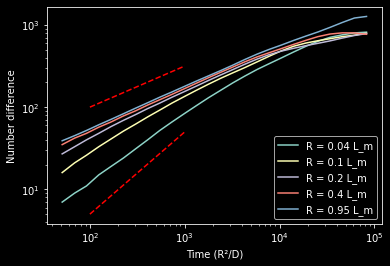

In [25]:
fig, ax = plt.subplots()
mask = (intervals>=5E1)*(intervals<=1E5)
for factor in data.keys():
    ax.loglog(intervals[mask], data[factor]['n_difference'][mask], label=f'R = {factor} L_m')
ax.loglog([1E2, 1E3], 0.05*np.array([1E2, 1E3]), c='r', ls='--')
ax.loglog([1E2, 1E3], 10*(np.array([1E2, 1E3]))**(1/2), c='r', ls='--')
ax.legend()
ax.set_xlabel('Time (R²/D)')
ax.set_ylabel('Number difference')
# ax.set_xlim(5E1, 1E5)
# ax.set_ylim(5E1, 1E5)

In [36]:
for factor in data.keys():
    freqs_welch_elastic, psd_welch_elastic = welch(data[factor]['DeltaN'], 1/dt , nperseg=1E5)
    data[factor]['psd'] = (freqs_welch_elastic, psd_welch_elastic)

(0.5, 1000000.0)

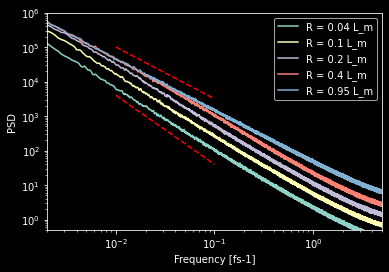

In [45]:
from scipy.signal import welch

fig, ax = plt.subplots()
# mask = (intervals>=5E1)*(intervals<=1E5)
for factor in data.keys():
    # FT = np.fft.rfft(data[factor]['DeltaN'])
    # freq = np.fft.rfftfreq(Nsteps,dt)
    # psd = FT * np.conjugate(FT)
    freqs_welch_elastic, psd_welch_elastic = data[factor]['psd']
    ax.loglog(freqs_welch_elastic/(D/R**2), psd_welch_elastic/N**2, label=f'R = {factor} L_m')
ax.loglog([1E-2, 1E-1], 0.4*np.array([1E-2, 1E-1])**-2, c='r', ls='--')
ax.loglog([1E-2, 1E-1], 100*np.array([1E-2, 1E-1])**(-3/2), c='r', ls='--')
ax.legend()
ax.set_xlabel('Frequency [fs-1]')
ax.set_ylabel('PSD')
ax.set_xlim(2E-3, 5)
ax.set_ylim(0.5, 1E6)